Loading required dependancies (pandas and matplotlib)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

store tha data locally whilst filtering out the irrelivent data

In [20]:
data_frame = pd.read_csv("rb_ranks_1.csv")


Filtered_df = data_frame[
(data_frame['nation'] == 'USSR') &
(data_frame['rb_lower_br'] == 10.3) &
(data_frame['cls'] == "Ground_vehicles")
]

first 5 rows of my dataset

In [21]:
Filtered_df.head()

,nation,cls,date,rb_br,rb_lower_br,rb_battles_sum,rb_battles_mean,rb_win_rate,rb_air_frags_per_battle,rb_air_frags_per_death,rb_ground_frags_per_battle,rb_ground_frags_per_death
87508,USSR,Ground_vehicles,2025-03-13,10.3 ~ 11.3,10.3,26447.0,2025.205524,43.683659,0.125058,0.133426,1.400301,1.177308
87548,USSR,Ground_vehicles,2025-03-10,10.3 ~ 11.3,10.3,28748.0,2206.543603,44.086124,0.125758,0.134527,1.402226,1.178980
87588,USSR,Ground_vehicles,2025-03-07,10.3 ~ 11.3,10.3,31578.0,2429.886115,44.375018,0.126828,0.136502,1.402797,1.176742
87628,USSR,Ground_vehicles,2025-03-04,10.3 ~ 11.3,10.3,34332.0,2652.591613,44.490702,0.127952,0.140487,1.400346,1.176700
87668,USSR,Ground_vehicles,2025-03-01,10.3 ~ 11.3,10.3,37311.0,2892.013682,44.387873,0.128465,0.139048,1.390079,1.175382


.info() gives a summary of each collum 

In [22]:
Filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 87508 to 111388
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nation                      598 non-null    object 
 1   cls                         598 non-null    object 
 2   date                        598 non-null    object 
 3   rb_br                       598 non-null    object 
 4   rb_lower_br                 598 non-null    float64
 5   rb_battles_sum              598 non-null    float64
 6   rb_battles_mean             598 non-null    float64
 7   rb_win_rate                 598 non-null    float64
 8   rb_air_frags_per_battle     598 non-null    float64
 9   rb_air_frags_per_death      598 non-null    float64
 10  rb_ground_frags_per_battle  598 non-null    float64
 11  rb_ground_frags_per_death   598 non-null    float64
dtypes: float64(8), object(4)
memory usage: 60.7+ KB


describe() gives basic knowledge for collums 

In [23]:
Filtered_df.describe()

,rb_lower_br,rb_battles_sum,rb_battles_mean,rb_win_rate,rb_air_frags_per_battle,rb_air_frags_per_death,rb_ground_frags_per_battle,rb_ground_frags_per_death
count,5.980000e+02,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,1.030000e+01,49161.331104,9861.487393,57.212514,0.134077,0.153435,1.486609,1.433800
std,1.777844e-15,18271.195157,5432.095944,8.147205,0.050470,0.059364,0.126482,0.133886
min,1.030000e+01,10229.000000,1705.519082,35.810986,0.016610,0.017036,1.163887,1.103486
25%,1.030000e+01,36926.250000,4745.346072,51.689037,0.107908,0.118092,1.390774,1.361764
50%,1.030000e+01,49518.000000,9697.457200,58.461965,0.141315,0.169553,1.475206,1.458264
75%,1.030000e+01,59398.500000,13691.213119,64.314032,0.167287,0.196747,1.587067,1.526865
max,1.030000e+01,104826.000000,22619.022242,72.909786,0.294670,0.290464,1.749421,1.740431


plots chosen information from dataset on a generated graph

<Axes: >

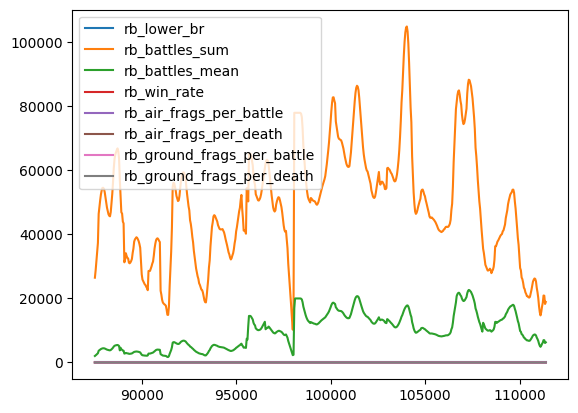

In [24]:
Filtered_df.plot()

from the start of the dataset, grabs the first and last date. then gets every month inbetween there into a value.

In [25]:
Filtered_df['date'] = pd.to_datetime(Filtered_df['date'])

start_date = pd.Timestamp('2020-01-01')
Filtered_df = Filtered_df[Filtered_df['date'] >= start_date]

Filtered_df['month_year'] = Filtered_df['date'].dt.to_period('M')

/tmp/ipykernel_6023/3669687216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_df['date'] = pd.to_datetime(Filtered_df['date'])
/tmp/ipykernel_6023/3669687216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_df['month_year'] = Filtered_df['date'].dt.to_period('M')


graph based on the date value, showing the winrate each month.

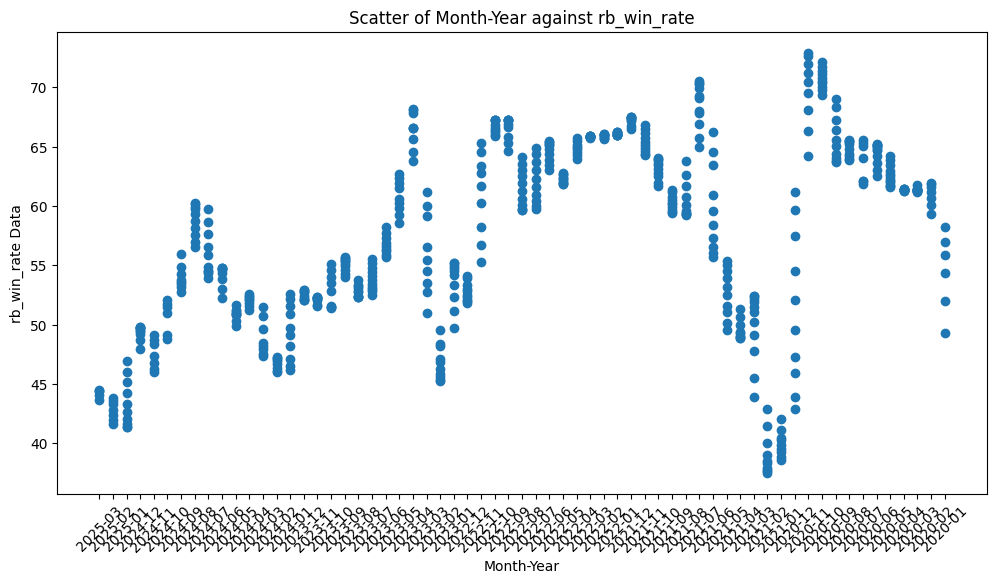

In [26]:


plt.figure(figsize=(12, 6))
plt.scatter(Filtered_df['month_year'].astype(str), Filtered_df['rb_win_rate'])
plt.title(f"Scatter of Month-Year against {Filtered_df['rb_win_rate'].name}")
plt.ylabel(f'{Filtered_df['rb_win_rate'].name} Data')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.show()